<a href="https://colab.research.google.com/github/lvb86/PD_LSTM_GA/blob/main/code/2004_2021_resenha_EPE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Etapa de análise e limpeza de dados

Preparando dados da Resenha Mensal EPE 
por: Leandro Barbosa

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#urlEPE = '/tmp/MERCADO MENSAL PARA DOWNLOAD COLADO.xls'
urlEPE = 'https://docs.google.com/uc?export=download&id=1FtYlt2iaradp5iEebKrWY3mLezRSSqRI'
#https://www.epe.gov.br/pt/publicacoes-dados-abertos/publicacoes/Consumo-mensal-de-energia-eletrica-por-classe-regioes-e-subsistemas

In [3]:
mapmes = {'JAN':'01', 'FEV':'02', 'MAR':'03', 'ABR':'04', 'MAI':'05', 'JUN':'06',
    'JUL':'07', 'AGO':'08', 'SET':'09', 'OUT':'10', 'NOV':'11', 'DEZ':'12'}

lista_setor = ['Residencial', 'Industrial', 'Comercial', 'Outros']

In [11]:
def df_ano_epe( sheet_name, Setor, s):
    df = pd.read_excel(urlEPE, sheet_name=sheet_name,skiprows=4,usecols=None)
    try:
        df.iloc[0+16*s:1+16*s,:]= int(df.iloc[0+16*s:1+16*s,1].str[0:4])
    except: 
        df.iloc[0+16*s:1+16*s,:]= df.iloc[0+16*s:1+16*s,1]
    finally:
        df = df.iloc[0+16*s:9+16*s,:].T.reset_index()
        df.columns = ['old','Ano','Mes','Total','Reg','Norte','Nordeste','Sudeste','Sul','CentoOeste']
        df = df.drop(columns=['old','Reg'])[1:13]
        df.Mes = df.Mes.map(mapmes)
        df['Ano Mês'] = df.Ano.astype(str) +'-'+ df.Mes
        #df.drop(columns = ['Ano', 'Mes'], inplace = True)
        df['Setor']   = Setor
        df.Ano        = df.Ano.astype(int)
        df.Total      = df.Total.astype(float)
        df.Norte      = df.Norte.astype(float)
        df.Nordeste   = df.Nordeste.astype(float)
        df.Sudeste    = df.Sudeste.astype(float)
        df.Sul        = df.Sul.astype(float)
        df.CentoOeste = df.CentoOeste.astype(float)
        
        return df[df.Total > 0]

In [10]:
for sheet, setor in enumerate(lista_setor):
    print(sheet, setor)

0 Residencial
1 Industrial
2 Comercial
3 Outros


In [12]:
for sheet, setor in enumerate(lista_setor):
    for s in range(18):
        if sheet == 0 and s ==0: 
            dfEPE = df_ano_epe( sheet+1,setor,s)
        else: 
            dfEPE = dfEPE.append(df_ano_epe( sheet+1,setor,s))
dfEPE

,Ano,Mes,Total,Norte,Nordeste,Sudeste,Sul,CentoOeste,Ano Mês,Setor
1,2021,01,13597745.91,830281.77,2758984.88,6571311.64,2260371.61,1176796.01,2021-01,Residencial
2,2021,02,12816225.52,803678.00,2619758.51,6192199.70,2107756.15,1092833.16,2021-02,Residencial
3,2021,03,13204377.21,820022.59,2727749.08,6321507.66,2190795.20,1144302.68,2021-03,Residencial
4,2021,04,13295462.41,864941.75,2774864.34,6349461.85,2109543.78,1196650.69,2021-04,Residencial
5,2021,05,11916732.03,859232.55,2536646.39,5591479.32,1867454.95,1061918.82,2021-05,Residencial
...,...,...,...,...,...,...,...,...,...,...
8,2004,08,3892772.35,212999.10,726332.07,1833404.77,714015.51,406020.90,2004-08,Outros
9,2004,09,4045925.14,214694.08,766592.08,1890523.79,738705.75,435409.44,2004-09,Outros
10,2004,10,4226884.42,218705.12,798723.62,2053894.16,734053.68,421507.84,2004-10,Outros
11,2004,11,4054988.32,214175.36,813985.52,1908302.43,752820.39,365704.62,2004-11,Outros


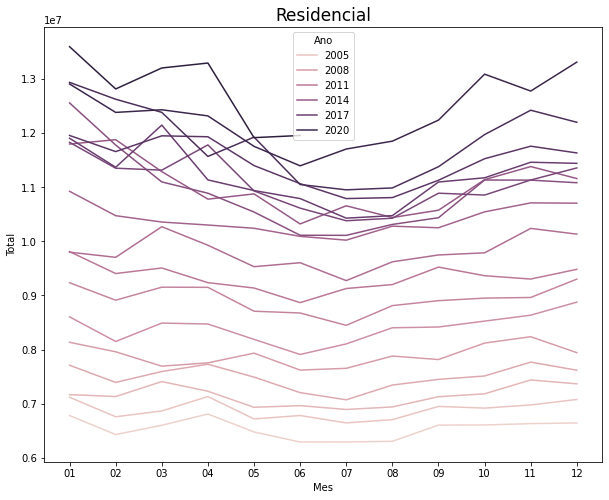

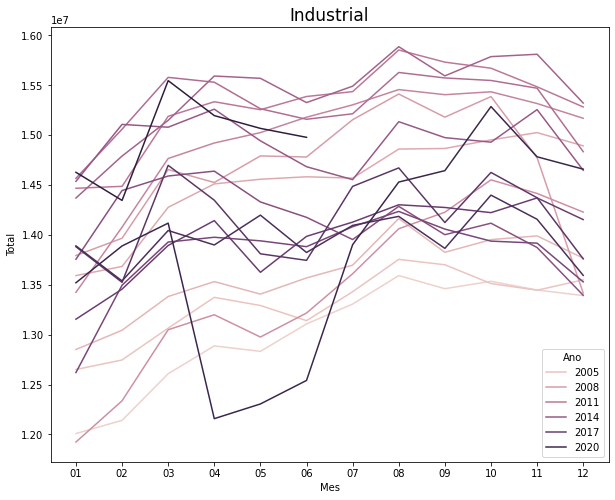

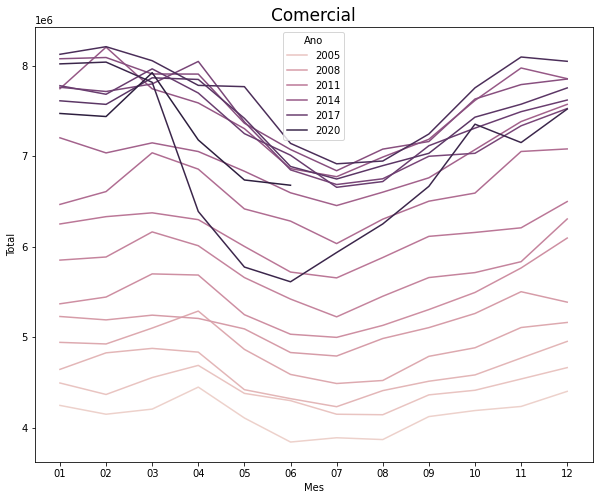

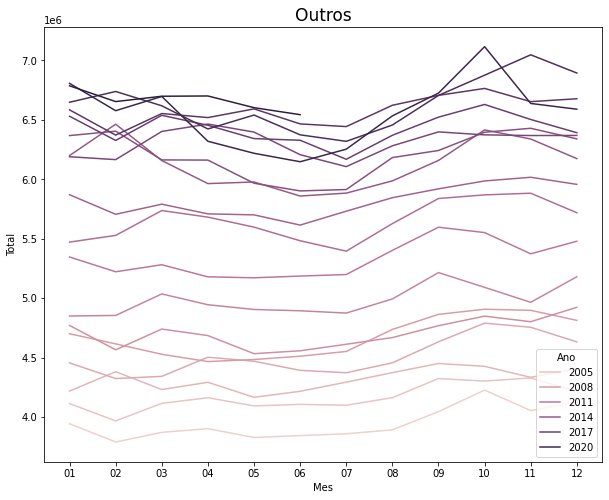

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

for e, i in enumerate(lista_setor): 
    plt.figure(figsize=(10,8))
    sns.lineplot(data = dfEPE.query(f'Setor == "{i}"'),x = 'Mes', y = 'Total', hue = 'Ano' )
    plt.title(i, fontsize = 17)

In [14]:
dfEPE.to_csv('/tmp/ResenhaEPE.csv', index=False)

In [15]:
dfEPE[(dfEPE.Ano == 2020) & (dfEPE.Mes == '01')]

,Ano,Mes,Total,Norte,Nordeste,Sudeste,Sul,CentoOeste,Ano Mês,Setor
1,2020,01,1.290851e+07,799553.99,2590818.60,6159440.55,2.244223e+06,1114472.03,2020-01,Residencial
1,2020,01,1.352021e+07,1268202.02,1823641.05,7075127.61,2.562807e+06,790429.29,2020-01,Industrial
1,2020,01,8.019492e+06,422928.21,1283465.06,4229303.52,1.453344e+06,630451.27,2020-01,Comercial
1,2020,01,6.806526e+06,399562.67,1424041.57,2693630.50,1.656269e+06,633022.49,2020-01,Outros
